<a href="https://colab.research.google.com/github/ianlap/PH591/blob/main/three_cornered_hat_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install allantools

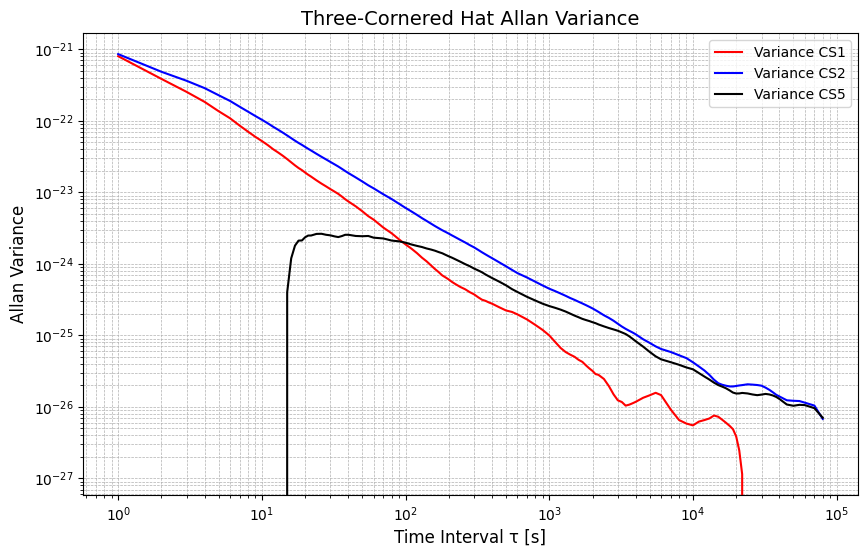

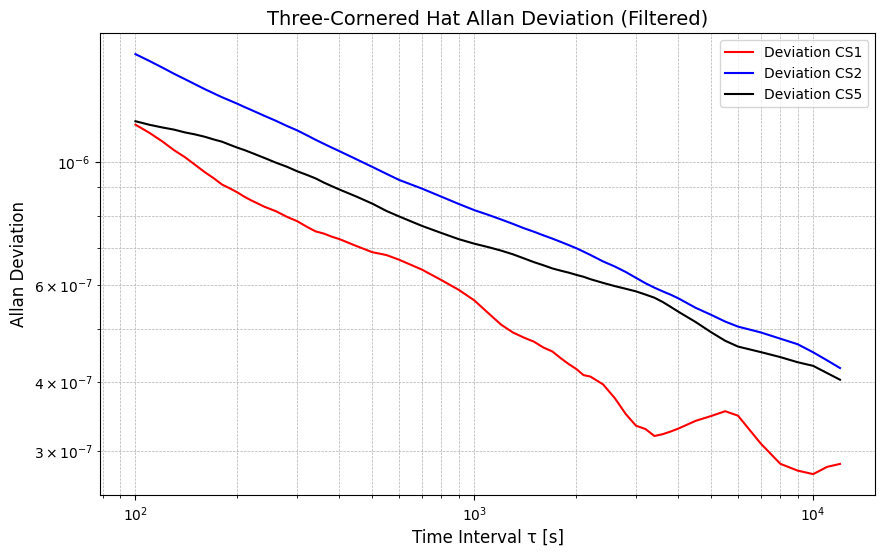

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import allantools as at

def load_allan_deviation_data():
    """
    Load Allan deviation data from predefined CSV files.
    Each file is expected to have tau values in the first column and adev values in the second column.

    Returns:
    tuple: (taus, adev_AB, adev_AC, adev_BC)
    """
    filenames = ['CS2_REF_CS1_InADEV.csv', 'CS5Ref_CS1inADEV.csv', 'CS5Ref_CS2inADEV.csv']
    data = [np.genfromtxt(file, delimiter=',', skip_header=0) for file in filenames]

    # Determine the minimum length among all datasets
    min_length = min(len(d) for d in data)

    # Truncate all datasets to the shortest length
    taus = data[0][:min_length, 0]
    adev_AB = data[0][:min_length, 1]
    adev_AC = data[1][:min_length, 1]
    adev_BC = data[2][:min_length, 1]

    return taus, adev_AB, adev_AC, adev_BC

def three_cornered_hat_variance(adev_AB, adev_AC, adev_BC):
    """
    Compute the Three-Cornered Hat variance estimates for three frequency sources.

    Returns:
    tuple: Estimated variances for sources A, B, and C
    """
    var_A = 0.5 * (adev_AB**2 + adev_AC**2 - adev_BC**2)
    var_B = 0.5 * (adev_AB**2 + adev_BC**2 - adev_AC**2)
    var_C = 0.5 * (adev_AC**2 + adev_BC**2 - adev_AB**2)

    return var_A, var_B, var_C

def plot_allan_variances(taus, var_A, var_B, var_C, title='Three-Cornered Hat Allan Variance'):
    """
    Plot the Three-Cornered Hat Allan variances.
    """
    plt.figure(figsize=(10, 6))
    plt.loglog(taus, var_A, 'r-', label='Variance CS1')
    plt.loglog(taus, var_B, 'b-', label='Variance CS2')
    plt.loglog(taus, var_C, 'k-', label='Variance CS5')
    plt.xlabel('Time Interval \u03C4 [s]', fontsize=12)
    plt.ylabel('Allan Variance', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

def plot_allan_deviations(taus, adev_A, adev_B, adev_C, title='Three-Cornered Hat Allan Deviation'):
    """
    Plot the Three-Cornered Hat Allan deviations (square root of variance).
    """
    plt.figure(figsize=(10, 6))
    plt.loglog(taus, np.sqrt(adev_A), 'r-', label='Deviation CS1')
    plt.loglog(taus, np.sqrt(adev_B), 'b-', label='Deviation CS2')
    plt.loglog(taus, np.sqrt(adev_C), 'k-', label='Deviation CS5')
    plt.xlabel('Time Interval \u03C4 [s]', fontsize=12)
    plt.ylabel('Allan Deviation', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Load Allan deviation data
taus, adev_AB, adev_AC, adev_BC = load_allan_deviation_data()

# Compute Three-Cornered Hat variances
var_A, var_B, var_C = three_cornered_hat_variance(adev_AB, adev_AC, adev_BC)

# Plot full Allan variances
plot_allan_variances(taus, var_A, var_B, var_C)

# Filter values within the range 10^2 to 10^(4.1)
mask = (taus >= 10**2) & (taus <= 10**4.1)
taus_filtered = taus[mask]
adev_A_filtered = np.sqrt(var_A[mask])
adev_B_filtered = np.sqrt(var_B[mask])
adev_C_filtered = np.sqrt(var_C[mask])

# Plot filtered Allan deviations
plot_allan_deviations(taus_filtered, adev_A_filtered, adev_B_filtered, adev_C_filtered, title='Three-Cornered Hat Allan Deviation (Filtered)')
